In [2]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
from pandas import Series, DataFrame
from numpy import nan as NA
from datetime import datetime, date
from pandas.tseries.offsets import MonthEnd
from IPython.display import display, Image, Markdown

from get_dynamics import change_positions, show_dynamics

In [4]:
now = datetime.now().date()
offset = MonthEnd()

<h3>Загрузка исходных данных</h3>

In [5]:
names = ['geo', 'url', 'note', 'cost', 'duration']
data = pd.read_csv('../raw_data.csv', names=names, index_col=[0,1]).fillna('')

In [14]:
%store -r organic
%store -r positions

<h2>1. Анализ бюджета</h2>

### Таблица расходов

In [7]:
curr_month = data.index[-1][0]
data.loc[curr_month]

,geo,url,note,cost,duration
0,both,https://sape.ru,биржа арендных ссылок,4000.00,1
1,both,https://etxt.biz,тексты,1055.00,1
2,both,https://ru.depositphotos.com/,фотосток,610.69,1
3,both,https://text.ru/,тексты,0.00,1
4,msk,https://collections.yandex.ru/user/love-foreve...,+500 карточек,3552.20,12
5,msk,http://www.urasvadba.ru/4062,,1009.50,1
6,spb,http://www.svadbaspb.ru/dress/133/,,505.00,1
7,spb,http://www.svadbaspb.ru/,,2020.00,1
8,msk,http://tableplanner.ru,,1090.00,1
9,spb,http://svadba-vals.ru/sovety-i-idei/svadebnye-...,,3120.00,12


**cost** — стоимость размещения: 0 — условно бесплатно.

**duration** — время размещения в месяцах: 1 — помесячная оплата, 12 — бессрочное размещение.

<a href="https://yadi.sk/d/Nh-WeRpo3Jfskg">Скачать</a> файл с исходными данными.

<a href="https://yadi.sk/d/1EXvjiS13JZEna">Посмотреть</a> платёжную информацию.

### Расходы в разрезе регионов за текущий период

In [11]:
#data.groupby('reg')[['cost']].sum()
budget = 51480.0
consumption = pd.pivot_table(data.ix[curr_month], values='cost', index=['geo'], 
                         aggfunc=sum, margins=True).loc['All']
budget - consumption

cost    277.56
Name: All, dtype: float64

array([<matplotlib.axes._subplots.AxesSubplot object at 0x109ecd860>], dtype=object)

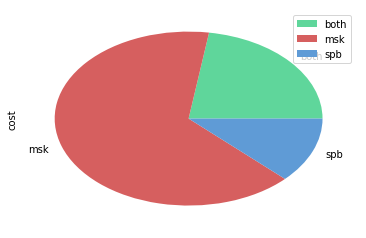

In [12]:
colors = ['#5fd69b', '#d65f5f', '#5f9bd6']
pd.pivot_table(data.loc[curr_month], values='cost', index=['geo'], 
                         aggfunc=sum).plot(kind='pie', subplots=True, colors=colors)

## 2. Анализ трафика

### 2.1. LOVE-FOREVER.RU

Таблица с данными по величине поискового трафика c 2016 года и его изменениям к месяцу и году.

In [15]:
# organic = organic.applymap(lambda x: '{:.2f}'.format(x))
show_dynamics(organic['msk']['2017':'2018'], 'branded')

,traffic,branded,MoM,YoY
2017-01-31,14468,9.39,60.1,-9.8
2017-02-28,12187,↓7.72 (-1.67),-15.8,-29.1
2017-03-31,14330,↑10.27 (+2.55),17.6,-19.6
2017-04-30,13821,↓10.19 (-0.08),-3.6,-21.8
2017-05-31,15041,↓9.60 (-0.59),8.8,-19.2
2017-06-30,15083,↓8.86 (-0.74),0.3,-19.9
2017-07-31,13169,↓7.55 (-1.31),-12.7,-22.8
2017-08-31,11153,↑7.65 (+0.1),-15.3,-29.1
2017-09-30,9186,↓6.64 (-1.01),-17.6,-31.9
2017-10-31,9752,↑6.85 (+0.21),6.2,-15.1


**Комментарий:** Органический трафик  относительно предыдущего месяца остался на прежнем уровне, а рост год к году составил приблизительно **+12%**. Доля брендового трафика показала небольшой рост.  

<p><b>branded</b> — количество брендового трафика, %
<br/><b>YoY</b> — изменения год к году, %
<br/><b>MoM</b> — изменения месяц к месяцу, %</p>

**Источник:** https://metrika.yandex.ru

### Линейная диаграмма изменения трафика

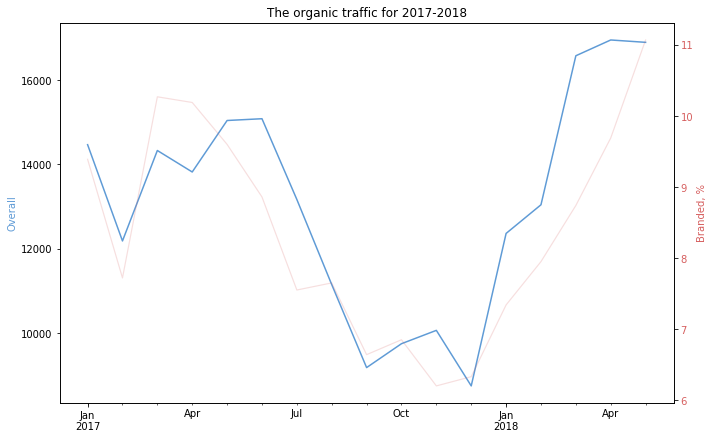

In [16]:
red, blue = '#d65f5f', '#5f9bd6'
fig = plt.figure(figsize=(11,7))
ax = fig.add_subplot(1,1,1)
organic['msk']['2017':'2018'].traffic.plot(ax=ax, color=blue)
ax.set_title('The organic traffic for 2017-2018')
ax.set_ylabel('Overall', color=blue)
# ax.legend(loc='upper right');
ax2 = ax.twinx()
organic['msk']['2017':'2018'].branded.plot(color=red, linewidth=1.2, alpha=.2)
# ax2.plot(y1, 'r-')
ax2.set_ylabel('Branded, %', color=red)
for tl in ax2.get_yticklabels():
    tl.set_color(red)

### Подсветка данных

In [12]:
# display(Image('img/data_neg_select.png'))

Отрицательные изменения (падение трафика) выделены красным.

In [13]:
# display(Image('img/data_grad.png'))

Ячейки таблицы градиентно залиты цветом в зависимости от величины содержимого.

### Диаграмма изменеия значений MoM 

In [17]:
negative_MoM = organic['msk']['2016':'2018']['MoM'] < 0

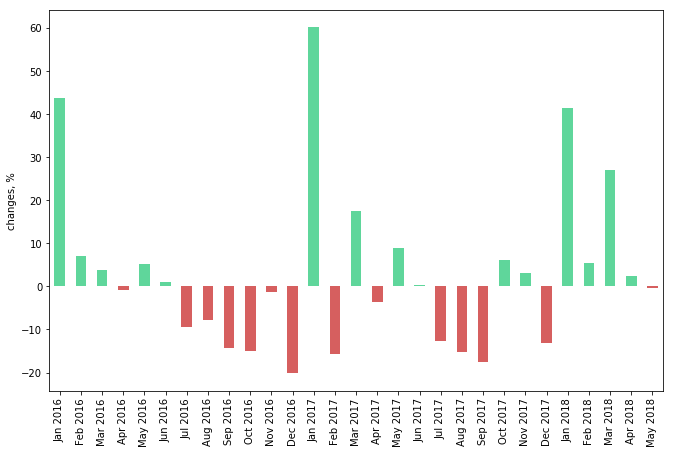

In [18]:
fig = plt.figure(figsize=(11,7))
ax = fig.add_subplot(1,1,1)
organic['msk']['2016':'2018'].MoM.plot(ax=ax, kind='bar', stacked=True, 
                 color=negative_MoM.map({True: '#d65f5f', False: '#5fd69b'}));
ax.set_ylabel('changes, %');
ticks = ax.set_xticklabels(['{:%b %Y}'.format(x) for x in organic['msk']['2016':'2018'].index]);

На диаграмме чётко видна сезонная волатильность поискового трафика.

### 2.2. SPB.LOVE-FOREVER.RU

Таблица с данными по органическому трафику с марта 2017

In [19]:
show_dynamics(organic['spb'], 'branded')

,traffic,branded,MoM,YoY
2017-03-31,13,15.38,NaN,NaN
2017-04-30,508,↑17.72 (+2.34),3807.7,NaN
2017-05-31,998,↑18.14 (+0.42),96.5,NaN
2017-06-30,1296,↓14.27 (-3.87),29.9,NaN
2017-07-31,1259,↓12.07 (-2.2),-2.9,NaN
2017-08-31,1065,↑16.81 (+4.74),-15.4,NaN
2017-09-30,1242,↓7.97 (-8.84),16.6,NaN
2017-10-31,1251,↑11.51 (+3.54),0.7,NaN
2017-11-30,1386,↓11.47 (-0.04),10.8,NaN
2017-12-31,1731,↓10.63 (-0.84),24.9,NaN


**Комментарий:** Рост органики в отностительных цифрах ~ **+4%**. Доля брендового трафика снижается.

In [20]:
# Средний показатель брендового трафика, %
"{}%".format(round(organic['spb']['branded'].mean(), 2))

'12.01%'

## 3. Анализ позиций

### 3.1. LOVE-FOREVER.RU

#### Позиции с интервалом в 7-10 дней
Выборка за май-июнь

In [21]:
All = slice(None)
cols_m = positions['msk'].columns.tolist()
indx_m = cols_m.index('salon-love-forever.ru')
cols_m.append(cols_m.pop(indx_m))

In [23]:
# positions['msk'] = positions['msk'].fillna(51).applymap(lambda x: int(x))
change_positions(positions['msk'][cols_m].loc[(slice('2018-05','2018-06'), All), All]) # .loc[['201707', '201711'], :]

marytrufel.ru domvesta.ru bel-avantage.ru  \
2018-05-07 вечерние платья             51          51              51   
           свадебные платья            12          48               3   
           свадебный салон             14          28              37   
2018-05-13 вечерние платья             51          48              51   
           свадебные платья            43          42               1   
           свадебный салон              1          16              27   
2018-05-18 вечерние платья             51          29              51   
           свадебные платья            22          41               5   
           свадебный салон             18          22              24   
2018-05-25 вечерние платья             51          43              51   
           свадебные платья             8          45               1   
           свадебный салон              2           8              51   
2018-06-03 вечерние платья             51          41              51   
           свадебные платья             6          44               2   
           свадебный салон              2          12              51   
2018-06-10 вечерние платья             51          40              51   
           свадебные платья             6          44               1   
           свадебный салон              2          11              51   
2018-06-17 вечерние платья             51   ↓51 (-11)              51   
           свадебные платья      ↓12 (-6)    ↑40 (+4)         ↓3 (-2)   
           свадебный салон        ↓4 (-2)    ↓12 (-1)        ↑48 (+3)   

                            salon-love-forever.ru  
2018-05-07 вечерние платья                     13  
           свадебные платья                     6  
           свадебный салон                     21  
2018-05-13 вечерние платья                     11  
           свадебные платья                     6  
           свадебный салон                      8  
2018-05-18 вечерние платья                     15  
           свадебные платья                    12  
           свадебный салон                     10  
2018-05-25 вечерние платья                     14  
           свадебные платья                    12  
           свадебный салон                     12  
2018-06-03 вечерние платья                      8  
           свадебные платья                     8  
           свадебный салон                     13  
2018-06-10 вечерние платья                     14  
           свадебные платья                     9  
           свадебный салон                      9  
2018-06-17 вечерние платья               ↓20 (-6)  
           свадебные платья                     9  
           свадебный салон              ↓25 (-16)

**Комментарий:** нестабильная ситуация по позициям, что в основной выдаче, что в XML все еще заметна. 

#### Среднее значение позиций по месяцам и его изменение

In [24]:
change_positions(positions['msk'][cols_m].unstack().resample('M', 
                            kind='period').mean().applymap(lambda x: round(x)).stack())

marytrufel.ru domvesta.ru bel-avantage.ru  \
2017-06 вечерние платья             44          23              51   
        свадебные платья            12           6               3   
        свадебный салон             11           4              15   
2017-07 вечерние платья             45          19              51   
        свадебные платья            19           5               2   
        свадебный салон              5           4              12   
2017-08 вечерние платья             44          26              51   
        свадебные платья            10           6               2   
        свадебный салон             13          23              38   
2017-09 вечерние платья             38          28              51   
        свадебные платья             8           5               2   
        свадебный салон              1          16              28   
2017-10 вечерние платья             40          26              51   
        свадебные платья            12           5               2   
        свадебный салон              1          20              24   
2017-11 вечерние платья             41          21              51   
        свадебные платья             8           4               2   
        свадебный салон              1          17              34   
2017-12 вечерние платья             51          21              51   
        свадебные платья            17          34               1   
        свадебный салон              1          11              32   
2018-01 вечерние платья             51          35              51   
        свадебные платья            11          44               1   
        свадебный салон              2          10              50   
2018-02 вечерние платья             51          45              51   
        свадебные платья            43          42               1   
        свадебный салон              1          15              26   
2018-03 вечерние платья             51          50              51   
        свадебные платья            16          42               3   
        свадебный салон              3          25              44   
2018-04 вечерние платья             51          40              51   
        свадебные платья            24          42               4   
        свадебный салон              8          37              33   
2018-05 вечерние платья             51          43              51   
        свадебные платья            21          44               2   
        свадебный салон              9          18              35   
2018-06 вечерние платья             51    ↓44 (-1)              51   
        свадебные платья      ↑8 (+13)    ↑43 (+1)               2   
        свадебный салон        ↑3 (+6)    ↑12 (+6)       ↓50 (-15)   

                         salon-love-forever.ru  
2017-06 вечерние платья                     14  
        свадебные платья                    17  
        свадебный салон                      4  
2017-07 вечерние платья                     14  
        свадебные платья                    11  
        свадебный салон                      8  
2017-08 вечерние платья                     27  
        свадебные платья                    37  
        свадебный салон                     23  
2017-09 вечерние платья                     16  
        свадебные платья                    46  
        свадебный салон                     22  
2017-10 вечерние платья                     10  
        свадебные платья                    27  
        свадебный салон                     14  
2017-11 вечерние платья                     12  
        свадебные платья                     6  
        свадебный салон                     13  
2017-12 вечерние платья                     10  
        свадебные платья                     9  
        свадебный салон                     13  
2018-01 вечерние платья                     12  
        свадебные платья                     8  
        свадебный салон                     14  

### 3.2. SPB.LOVE-FOREVER.RU

In [25]:
# Перемещение столбца spb.salon-love-forever.ru в крайнюю правую часть таблицы
cols = positions['spb'].columns.tolist()
indx = cols.index('spb.salon-love-forever.ru')
cols.append(cols.pop(indx))

In [26]:
positions['spb'] = positions['spb'].fillna(51).applymap(lambda x: int(x))

# change_positions(positions['spb'][cols].loc[(slice('2018-01','2018-02'), All), All].unstack().resample('W', 
#                             kind='period').mean().applymap(lambda x: round(x)).stack())
change_positions(positions['spb'][cols].loc[(slice('2018-05','2018-06'), All), All]) # .loc[['201707', '201711'], :]

jullybride.ru milanovera.ru spb.marytrufel.ru  \
2018-05-07 вечерние платья             26             2                22   
           свадебные платья            10             3                17   
           свадебный салон             15            51                11   
2018-05-13 вечерние платья             28             3                26   
           свадебные платья             7             3                 6   
           свадебный салон              7            51                 8   
2018-05-18 вечерние платья             51             5                29   
           свадебные платья            15             1                14   
           свадебный салон             51            51                11   
2018-05-25 вечерние платья             30             3                27   
           свадебные платья            19             4                15   
           свадебный салон             18            51                12   
2018-06-03 вечерние платья             36             4                21   
           свадебные платья            14             2                12   
           свадебный салон             11            51                 5   
2018-06-10 вечерние платья             28             3                26   
           свадебные платья             7             3                 6   
           свадебный салон              7            51                 8   
2018-06-18 вечерние платья       ↑27 (+1)       ↓4 (-1)                26   
           свадебные платья      ↓13 (-6)             3          ↓12 (-6)   
           свадебный салон        ↑2 (+5)            51          ↓13 (-5)   

                            vbelom.ru vesnawedding.ru  \
2018-05-07 вечерние платья          9              51   
           свадебные платья         8               2   
           свадебный салон          7               5   
2018-05-13 вечерние платья         14              51   
           свадебные платья        11               2   
           свадебный салон         13               9   
2018-05-18 вечерние платья         19              51   
           свадебные платья         8               3   
           свадебный салон         16              14   
2018-05-25 вечерние платья          6              51   
           свадебные платья        10               3   
           свадебный салон          6               4   
2018-06-03 вечерние платья         18              51   
           свадебные платья        10               3   
           свадебный салон          8               2   
2018-06-10 вечерние платья         14              51   
           свадебные платья        11               2   
           свадебный салон         13               9   
2018-06-18 вечерние платья   ↑12 (+2)              51   
           свадебные платья   ↑9 (+2)               2   
           свадебный салон    ↑7 (+6)         ↑5 (+4)   

                            spb.salon-love-forever.ru  
2018-05-07 вечерние платья                         48  
           свадебные платья                         5  
           свадебный салон                         43  
2018-05-13 вечерние платья                         14  
           свадебные платья                         4  
           свадебный салон                         10  
2018-05-18 вечерние платья                         17  
           свадебные платья                         7  
           свадебный салон                          8  
2018-05-25 вечерние платья                         13  
           свадебные платья                         7  
           свадебный салон                         22  
2018-06-03 вечерние платья                         49  
           свадебные платья                         5  
           свадебный салон                         18  
2018-06-10 вечерние платья                         14  
           свадебные платья                         4  
           свадебный салон                         10  
2018-06-18 веч

**Комментарий:** так же наблюдается нестабильный SERP. Думаю, в ближайшее несколько недель устаканится.

#### Среднее значение позиций по месяцам и его изменение

In [27]:
change_positions(positions['spb'][cols].unstack().resample('M', 
                                kind='period').mean().applymap(lambda x: round(x)).stack())

jullybride.ru milanovera.ru spb.marytrufel.ru  \
2017-08 вечерние платья             36            42                51   
        свадебные платья            35            43                41   
        свадебный салон             42            47                36   
2017-09 вечерние платья             10            46                51   
        свадебные платья             8            30                14   
        свадебный салон             19            47                 9   
2017-10 вечерние платья              3            16                51   
        свадебные платья             4             2                17   
        свадебный салон              4            51                19   
2017-11 вечерние платья             13             1                51   
        свадебные платья            16             2                18   
        свадебный салон             27            51                17   
2017-12 вечерние платья              9             2                51   
        свадебные платья            11             2                29   
        свадебный салон             11            51                10   
2018-01 вечерние платья             10             1                47   
        свадебные платья            11             3                26   
        свадебный салон              8            51                 4   
2018-02 вечерние платья             22             3                40   
        свадебные платья            44            41                45   
        свадебный салон              7            51                 8   
2018-03 вечерние платья             30             3                20   
        свадебные платья            14             3                13   
        свадебный салон             11            51                 7   
2018-04 вечерние платья             28             3                24   
        свадебные платья             9             3                 8   
        свадебный салон              5            51                 9   
2018-05 вечерние платья             34             3                26   
        свадебные платья            13             3                13   
        свадебный салон             23            51                10   
2018-06 вечерние платья       ↑30 (+4)       ↓4 (-1)          ↑24 (+2)   
        свадебные платья      ↑11 (+2)             3          ↑10 (+3)   
        свадебный салон       ↑7 (+16)            51           ↑9 (+1)   

                         vbelom.ru vesnawedding.ru spb.salon-love-forever.ru  
2017-08 вечерние платья         45              51                        35  
        свадебные платья        42              34                        23  
        свадебный салон         35              36                        45  
2017-09 вечерние платья         17              51                        18  
        свадебные платья        16               1                         8  
        свадебный салон          1               6                        27  
2017-10 вечерние платья         10              51                        26  
        свадебные платья        10               1                         6  
        свадебный салон          1               3                        24  
2017-11 вечерние платья         11              51                        22  
        свадебные платья         8               1                         7  
        свадебный салон          1               4                        33  
2017-12 вечерние платья          9              51                        27  
        свадебные платья        13               1                         5  
        свадебный салон          5               8                        37  
2018-01 вечерние платья         11              51                        15  
        свадебные платья        20               1                         6  
        свадебный салон          8               4                        17  
2018-02

**Источник:** https://xml.yandex.ru

Позиции в таблице и в текущей выдаче Яндекса могут отличаться из-за особенностей сервиса xml.yandex, а также от индивидуализации SERP.

**51** — отсутствие сайта в ТОП-50.